In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import spikeinterface.full as si
from probeinterface import generate_multi_columns_probe

Matplotlib created a temporary cache directory at /tmp/matplotlib-lh1jquqk because the default path (/home/jupyter-ikharitonov/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


(-70.0, 120.0)

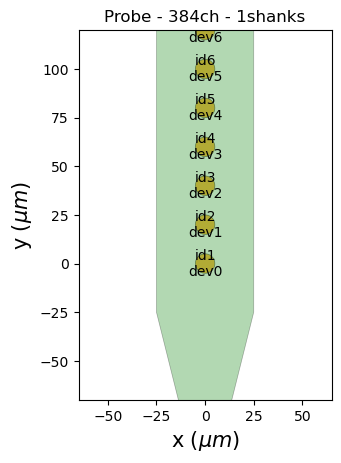

In [2]:
# generate a fake probe
fig, ax = plt.subplots()
probe = generate_multi_columns_probe(
    num_columns=1,
    num_contact_per_column=384,
    xpitch=20,
    ypitch=20,
    y_shift_per_column=[0, -10, 0],
    contact_shapes="circle",
    contact_shape_params={"radius": 5},
    
)
probe.set_contact_ids([f'{i+1}' for i in range(probe.get_contact_count())])
probe.set_device_channel_indices(np.arange(probe.get_contact_count()))


from probeinterface.plotting import plot_probe
plot_probe(probe, with_contact_id=True, with_device_index=True, ax=ax)
ax.set_ylim(-70, 120)

In [3]:
duration = 1 * 60 * 60 # 1 hour
# sampling_rate = 17000
sampling_rate = 32000

In [4]:
rec, sorting = si.generate_ground_truth_recording(
    durations=[duration],
    sampling_frequency=sampling_rate,
    probe=probe,
    num_units=400,
    generate_sorting_kwargs={
        'firing_rates': 100,
        'refractory_period_ms': 1.5
    },
    generate_unit_locations_kwargs={
        'margin_um': 10.0,
        'minimum_z': 10.0,
        'maximum_z': 50.0
    },
    seed=2023)
rec

InjectTemplatesRecording: 384 channels - 32.0kHz - 1 segments - 115,200,000 samples 
                          3,600.00s (1.00 hours) - float32 dtype - 164.79 GiB

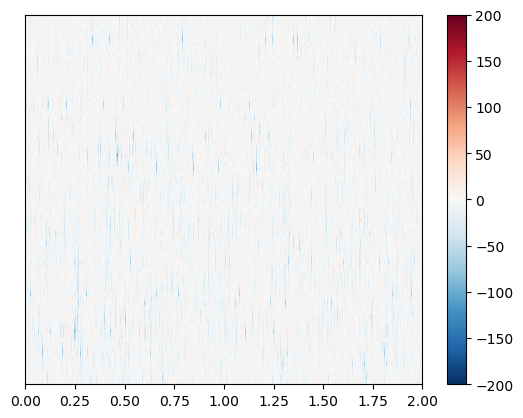

In [5]:
si.plot_traces(rec, time_range=(0,2), channel_ids=rec.channel_ids[:80])
# plt.xlim([0,50])
# si.plot_traces(rec, time_range=(120, 125), mode='line', channel_ids=rec.channel_ids[::10])

In [6]:
one_channel_signal = rec.get_traces(channel_ids=[0])

MemoryError: Unable to allocate 165. GiB for an array with shape (115200000, 384) and data type float32

In [6]:
plt.plot(one_channel_signal.astype(np.int16))
plt.xlim([2*17000,2*17000 + 17000//20])

NameError: name 'one_channel_signal' is not defined

In [7]:
print(one_channel_signal.shape)
one_channel_signal

NameError: name 'one_channel_signal' is not defined

In [8]:
one_channel_signal.astype(np.int16)

NameError: name 'one_channel_signal' is not defined

In [13]:
si.write_binary_recording(rec, file_paths=Path.home() / 'RANCZLAB-NAS' / 'test_recording2.dat', dtype=np.int16, n_jobs=-1)

write_binary_recording:   0%|          | 0/3600 [00:00<?, ?it/s]

In [12]:
sorting.save(folder = Path.home() / 'RANCZLAB-NAS' / 'test_sorting2', format='npz_folder', n_jobs=-1)

NpzFolderSorting: 400 units - 1 segments - 32.0kHz

In [10]:
sorting.save?

Signature: sorting.save(**kwargs) -> 'BaseExtractor'
Docstring:
Save a SpikeInterface object.

Parameters
----------
kwargs: Keyword arguments for saving.
    * format: "memory", "zarr", or "binary" (for recording) / "memory" or "numpy_folder" or "npz_folder" for sorting.
        In case format is not memory, the recording is saved to a folder. See format specific functions for
        more info (`save_to_memory()`, `save_to_folder()`, `save_to_zarr()`)
    * folder: if provided, the folder path where the object is saved
    * name: if provided and folder is not given, the name of the folder in the global temporary
            folder (use set_global_tmp_folder() to change this folder) where the object is saved.
      If folder and name are not given, the object is saved in the global temporary folder with
      a random string
    * dump_ext: 'json' or 'pkl', default 'json' (if format is "folder")
    * verbose: if True output is verbose
    * **save_kwargs: additional kwargs format-de